In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#데이터 불러오기(그림그리기 위해 label컬럼을 인덱스로)
tbl = pd.read_csv("./data/bmi.csv", index_col=2)

In [3]:
tbl.head()

,height,weight
label,,
normal,140,45
fat,145,72
fat,150,61
fat,137,56
thin,192,48


In [4]:
#어떤 컬럼이 있는지 확인
#fat:지방, normal:표준, thin:얇은
tbl.index.unique()

Index(['normal', 'fat', 'thin'], dtype='object', name='label')

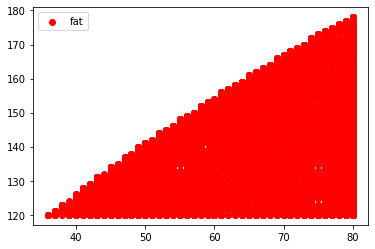

In [5]:
fat = tbl.loc["fat"]
plt.scatter(fat['weight'], fat['height'], label="fat", color="red")
plt.legend()
plt.show()

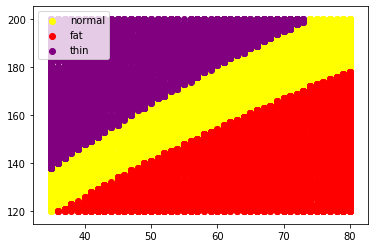

In [6]:
for label, color in zip(tbl.index.unique(), ["yellow", "red", "purple"]):
    temp = tbl.loc[label]
    plt.scatter(temp['weight'], temp['height'], label=label, color=color)

plt.legend()
plt.show()

In [7]:
data = pd.read_csv("./data/bmi.csv")
data.head()

,height,weight,label
0,140,45,normal
1,145,72,fat
2,150,61,fat
3,137,56,fat
4,192,48,thin


In [8]:
data['label'].value_counts()

fat       7712
thin      6338
normal    5950
Name: label, dtype: int64

In [9]:
data.shape

(20000, 3)

In [10]:
#결측치도 없음
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
height    20000 non-null int64
weight    20000 non-null int64
label     20000 non-null object
dtypes: int64(2), object(1)
memory usage: 468.9+ KB


### 실습 1 iloc을 활용해 7:3으로 나누게하기

In [11]:
train = data.iloc[:14000]
test = data.iloc[14000:]

In [12]:
print(train.shape)
print(test.shape)

(14000, 3)
(6000, 3)


### 실습 2 iloc을 활용해 X_train,y_train,X_test,y_test 나누게하기

In [13]:
X_train = train[["height", "weight"]]
y_train = train["label"]

In [14]:
X_train.shape, y_train.shape

((14000, 2), (14000,))

In [15]:
X_test = test[["height", "weight"]]
y_test = test["label"]

In [16]:
X_test.shape, y_test.shape

((6000, 2), (6000,))

### 실습 3 KNN 분류 알고리즘을 사용하여 모델 만들기(이웃의 수는 3)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
model = KNeighborsClassifier(n_neighbors=3)

### 실습 4 fit을 이용해 학습시키게하기

In [19]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### 실습 5 predict를 이용해 예측하게하기

In [20]:
pred = model.predict(X_test)

In [21]:
pred

array(['normal', 'thin', 'normal', ..., 'normal', 'normal', 'thin'],
      dtype=object)

### 실습 6 모델 평가하기 

In [22]:
print(f"정답률: {model.score(X_train, y_train) * 100}%")

정답률: 99.91428571428571%


### 실습 7 자신 정보를 분류 해보세요

In [23]:
model.predict([[170, 60]])

array(['normal'], dtype=object)